<a href="https://colab.research.google.com/github/Alecia113/NLP-Ex/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##E1. Briefly describe the impact of window size selection on the Word2Vec?
Please write down your answer below with your own words. 

In [ ]:
#@Lab01 - E1

Answer = "Window sizes are divided into two main categories, small window sizes (2-15) and larger window sizes (15-50). The impact for Word2Vec is that if the small window is chosen the vector is trained. If AB is similar, then AB can be replaced with each other. If the vectors trained with the large window. The AB similarity of words represents their spatial location. the ABs belong to the same general class of words." #@param {type:"raw"}

##E2. CBOW implementation with PyTorch nn.Module and torch.optim

In the tutorial, we learned how to train a word2vec skip-gram model in pytorch with manually updates the parameters (weights). 


In this Lab 03 E2, please:

1.   use the "NN Model (**nn.Module**)" and the "Optimiser (**torch.optim**)" (that we learned in the above sections) to train a word2vec **CBOW (NOT Skip Gram)** model  on the provided toy data with widow_size=1 and embedding_size=2. 
2.   visualize (plot) the trained embeddings for each word in the vocabulary



Note: The embedding size should 2. The code for the preprocessing and the hyperparmeter setup are provided. Have fun!


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from random import shuffle

# Raw data - sentences
# Let's create toy data for simplicity 
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_list = " ".join(sentences).split()
word_list = list(set(word_list))


# make dictionary so that we can reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}

# make window size=1 for cbow
# i.e.) he likes cat
#   -> ([likes], he), ([he, cat], likes), ([likes], cat)
#   -> ([likes, likes], he), ([he, cat], likes), ([likes, likes], cat)
# Double the input when the word doesn't have two neighbours
# This will make your input have the same size, which will make it easier when you write the CBOW model code
# But this trick only works when window_size = 1

cbow = []

for sentence in sentences:
    sentence = sentence.split()
    for i in range(len(sentence)):
        centre = word_dict[sentence[i]]
        if i > 0 and i < len(sentence)-1:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i + 1]]]
        elif i == 0:
            context = [word_dict[sentence[i + 1]], word_dict[sentence[i + 1]]]
        else:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i - 1]]]

        cbow.append([context, centre])

# hyperparameter
voc_size = len(word_list)
learning_rate = 0.1
batch_size = 16
embedding_size = 2
no_of_epochs = 5000

In [ ]:
# Read the requirement carefully and implement the code by your own to fulfill the requirement.
# You need to prepare batch data by yourself
# You can refer to the code from the labs
# Please try to make your code tidy with decent comments
 #prepare batch

voc_size = len(word_list)   #13

def prepare_batch(data_temp):
    x1 = []   #window1
    x2 = [] #window2 context
    #data_temp = cbow

    inputs = []
    labels = []
    inputs1 = []

    for i in range(len(data_temp)):  # data = data_temp
      input1_temp = [0]*voc_size
      input1_temp[data_temp[i][0][0]] = 1     #48  first context word
      x1.append(input1_temp)      #48
      labels.append(data_temp[i][1])  # centre index   48 
 
      input2_temp = [0]*voc_size
      input2_temp[data_temp[i][0][1]] = 1   #second context word 48
      x2.append(input2_temp)  

      inputs1.append(x1[i])
      inputs1.append(x2[i])
      inputs.append(inputs1)
      inputs1 = []  

    return np.array(inputs), np.array(labels)


import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from random import shuffle

class Cbow_linear(nn.Module):
  def __init__(self,inputs, outputs):
    super(Cbow_linear,self).__init__()
    self.linear1 = nn.Linear(voc_size, embedding_size)
    self.linear2 = nn.Linear(embedding_size, voc_size)

  def forward(self, x):
    x1 = self.linear1(x[:,0])
    x2 = self.linear1(x[:,1])
    x = (F.relu(x1) + F.relu(x2))/2
    x = self.linear2(x)

    return x
    
model = Cbow_linear(voc_size, embedding_size)  # model = cbow_net
#print(model)


#opt
criterion = nn.CrossEntropyLoss() 
optimiser = optim.SGD(model.parameters(), lr=learning_rate)#, momentum=0.9

for epoch in range(no_of_epochs):
  shuffle(cbow)
  loss_sum = 0

  for ind in range(0,len(cbow),batch_size):     #ind: 0,16,32
    data_temp = cbow[ind : min(ind+batch_size,len(cbow))] # 3times 
    inputs_temp, labels_temp = prepare_batch(data_temp)

    inputs_torch = torch.from_numpy(inputs_temp).float()
    labels_torch = torch.from_numpy(labels_temp)

    

    log_softmax = F.log_softmax(model.forward(inputs_torch),dim = 1)
    loss = F.nll_loss(log_softmax, labels_torch)
    
    #GD
    optimiser.zero_grad()#j
    loss.backward()
    optimiser.step()

    loss_sum += loss.item()# if have not (end == 0)

  if epoch % 500 == 499: 
    print('Epoch: %d, loss: %.4f' %(epoch + 1, loss_sum))


Epoch: 500, loss: 4.7574
Epoch: 1000, loss: 4.3807
Epoch: 1500, loss: 4.2270
Epoch: 2000, loss: 4.1435
Epoch: 2500, loss: 4.0860
Epoch: 3000, loss: 4.0539
Epoch: 3500, loss: 4.0208
Epoch: 4000, loss: 4.0220
Epoch: 4500, loss: 4.0097
Epoch: 5000, loss: 3.9759


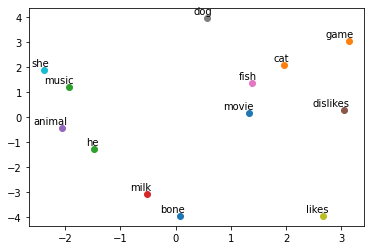

In [ ]:
# Get the trained projection matrix
trained_embeddings = model.linear1.weight.view(13,2).data.numpy()
# Visualise result
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    # print (label, " : ", x, " " , y) # uncomment to see the detailed vector info
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()